Split data to train and test, make model, evaluate model by comparing prediction with test_results

In [5]:
#prepare data downloaded from UCL
import tensorflow as tf
import xlrd
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from keras import Sequential
import copy

from tensorflow import lite
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error


# add header names
headers =  ["ertefaae_sine",'ertefaae_kol', 'result']
heart_df = pd.read_excel('trees.xlsx',sheet_name='Vol_Zaraieb_1', usecols=headers)

#convert imput to numpy arrays
X = heart_df.drop(columns=['result'])

y_label = heart_df['result'].values.reshape(X.shape[0], 1)
# print("heart_df['result']: {}".format(heart_df['result'], '2.4f'))
# print("Xtrain shib: {}".format(Xtrain['shib'], '2.4f'))


#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)
# print("ytrain: {}".format(ytrain, '2.4f'))

originalResults = copy.deepcopy(ytrain);
#standardize the dataset
scX = preprocessing.MinMaxScaler()
scX.fit(Xtrain)
Xtrain = scX.transform(Xtrain)
Xtest = scX.transform(Xtest)

scY = preprocessing.MinMaxScaler()
scY.fit(ytrain)
ytrain = scY.transform(ytrain)
ytest = scY.transform(ytest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

# define the model
model = Sequential()
model.add(Dense(3, input_shape=(2,)))

# model.add(Dropout())
model.add(Dense(1, activation= activations.sigmoid ))

# compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mae', metrics=['accuracy','mse'])
hist = model.fit(Xtrain, ytrain, epochs=700, verbose=0,shuffle=True, validation_split=0.1, batch_size=40)

# train_pred = model.predict(Xtrain)
test_pred = model.predict(Xtest)
y_scaled = scY.transform(y_label)

X = scX.transform(X)
complete_pred = model.predict(X)

Shape of train set is (159, 2)
Shape of test set is (40, 2)
Shape of train label is (159, 1)
Shape of test labels is (40, 1)


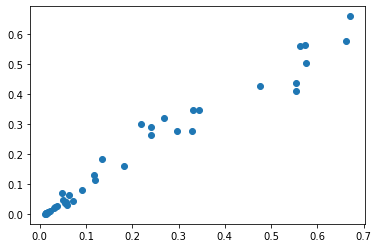

In [6]:
plt.scatter(test_pred, ytest)

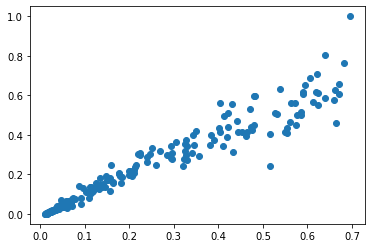

In [7]:
plt.scatter(complete_pred, y_scaled)

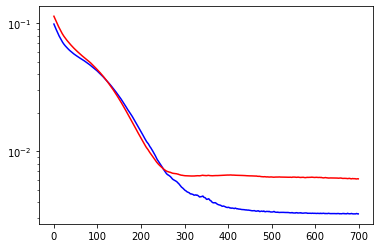

In [8]:
plt.plot(hist.history['mse'],c='blue')
plt.plot(hist.history['val_mse'], c='red')
plt.yscale('log',basey=10) 

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


model training and export of model and minimum and maximum values

In [10]:
#prepare data downloaded from UCL
import xlrd
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from keras import Sequential
import tensorflow as tf
from tensorflow import lite
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import copy


# add header names
headers =  ["ertefaae_sine",'ertefaae_kol', 'result']
heart_df = pd.read_excel('trees.xlsx',sheet_name='Vol_Zaraieb_1', usecols=headers)

#convert input to numpy arrays
X = heart_df.drop(columns=['result'])
Y = heart_df['result'].values.reshape(X.shape[0], 1)


#standardize the dataset
scX = preprocessing.MinMaxScaler()
scX.fit(X)
print(scX.data_min_)
print(scX.data_max_)
x_scaled = scX.transform(X)
scY = preprocessing.MinMaxScaler()
scY.fit(Y)
y_scaled = scY.transform(Y)
print(scY.data_min_)
print(scY.data_max_)

# define the model
model = Sequential()
model.add(Dense(3, input_shape=(2,)))
model.add(Dense(1, activation= activations.sigmoid ))

# compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mae', metrics=['accuracy','mse'])
hist = model.fit(x_scaled, y_scaled, epochs=400, verbose=0,shuffle=True, validation_split=0.1, batch_size=40)
y_scaled_predicted = model.predict(x_scaled)
y_predicted = y_scaled_predicted * (31.914 - 0.087) + 0.087


# export trained model to use in android(java)
keras_file='cf.h5'
models.save_model(model,keras_file)
converter=tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(keras_file)
tfmodel = converter.convert()
open("degree.tflite","wb").write(tfmodel)

[436.  13.]
[3860.    47.8]
[0.087]
[31.914]


1236

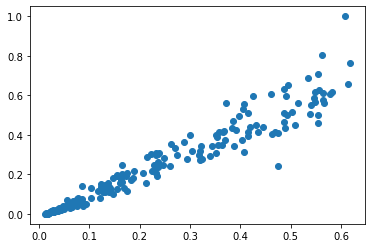

In [11]:
plt.scatter(y_scaled_predicted, y_scaled)

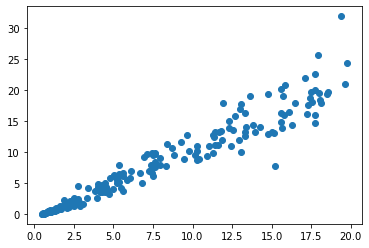

In [12]:
plt.scatter(y_predicted, Y)